# Project Title: Geospatial Earthquake Hotspot Mapping in Japan
### This project addresses the need to detect and visualize seismic hotspots using clustering techniques, helping identify most affected prefectures for better risk management.

## Imports

In [1]:
import geopandas as gpd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

## Load Data

In [2]:
# Load your earthquake CSV
df = pd.read_csv("datasets/Japan earthquakes 2001 - 2018.csv")
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-11-27T14:34:20.900Z,48.3780,154.9620,35.00,4.9,mb,NaN,92.0,5.044,0.63,...,2018-11-27T16:06:33.040Z,"269km SSW of Severo-Kuril'sk, Russia",earthquake,7.6,1.7,0.036,248.0,reviewed,us,us
1,2018-11-26T23:33:50.630Z,36.0733,139.7830,48.82,4.8,mww,NaN,113.0,1.359,1.13,...,2018-11-27T16:44:22.223Z,"3km SSW of Sakai, Japan",earthquake,6.0,6.1,0.071,19.0,reviewed,us,us
2,2018-11-26T13:04:02.250Z,38.8576,141.8384,50.56,4.5,mb,NaN,145.0,1.286,0.84,...,2018-11-26T23:52:21.074Z,"26km SSE of Ofunato, Japan",earthquake,8.4,9.5,0.156,12.0,reviewed,us,us
3,2018-11-26T05:20:16.440Z,50.0727,156.1420,66.34,4.6,mb,NaN,128.0,3.191,0.62,...,2018-11-26T08:13:58.040Z,"67km S of Severo-Kuril'sk, Russia",earthquake,9.7,7.8,0.045,151.0,reviewed,us,us
4,2018-11-25T09:19:05.010Z,33.9500,134.4942,38.19,4.6,mb,NaN,104.0,0.558,0.61,...,2018-11-25T23:24:52.615Z,"9km SW of Komatsushima, Japan",earthquake,3.4,10.1,0.132,17.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,2001-01-04T04:18:21.430Z,36.9810,138.6290,21.40,5.3,mwc,240.0,NaN,NaN,0.78,...,2016-11-09T21:35:38.927Z,"eastern Honshu, Japan",earthquake,NaN,5.4,NaN,NaN,reviewed,us,hrv
14088,2001-01-03T14:47:49.540Z,43.9320,147.8130,33.00,5.9,mwc,362.0,NaN,NaN,0.82,...,2016-11-09T04:09:27.754Z,Kuril Islands,earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
14089,2001-01-03T09:32:54.710Z,45.3010,149.9410,33.00,4.6,mb,40.0,NaN,NaN,0.82,...,2014-11-07T01:11:51.270Z,Kuril Islands,earthquake,NaN,NaN,NaN,20.0,reviewed,us,us
14090,2001-01-02T20:29:49.670Z,32.2390,141.5080,33.00,4.9,mb,32.0,NaN,NaN,0.96,...,2014-11-07T01:11:51.119Z,"Izu Islands, Japan region",earthquake,NaN,NaN,NaN,23.0,reviewed,us,us


## Clean Data

In [3]:
df = df.dropna(subset=['latitude', 'longitude', 'mag', 'depth'])
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-11-27T14:34:20.900Z,48.3780,154.9620,35.00,4.9,mb,NaN,92.0,5.044,0.63,...,2018-11-27T16:06:33.040Z,"269km SSW of Severo-Kuril'sk, Russia",earthquake,7.6,1.7,0.036,248.0,reviewed,us,us
1,2018-11-26T23:33:50.630Z,36.0733,139.7830,48.82,4.8,mww,NaN,113.0,1.359,1.13,...,2018-11-27T16:44:22.223Z,"3km SSW of Sakai, Japan",earthquake,6.0,6.1,0.071,19.0,reviewed,us,us
2,2018-11-26T13:04:02.250Z,38.8576,141.8384,50.56,4.5,mb,NaN,145.0,1.286,0.84,...,2018-11-26T23:52:21.074Z,"26km SSE of Ofunato, Japan",earthquake,8.4,9.5,0.156,12.0,reviewed,us,us
3,2018-11-26T05:20:16.440Z,50.0727,156.1420,66.34,4.6,mb,NaN,128.0,3.191,0.62,...,2018-11-26T08:13:58.040Z,"67km S of Severo-Kuril'sk, Russia",earthquake,9.7,7.8,0.045,151.0,reviewed,us,us
4,2018-11-25T09:19:05.010Z,33.9500,134.4942,38.19,4.6,mb,NaN,104.0,0.558,0.61,...,2018-11-25T23:24:52.615Z,"9km SW of Komatsushima, Japan",earthquake,3.4,10.1,0.132,17.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,2001-01-04T04:18:21.430Z,36.9810,138.6290,21.40,5.3,mwc,240.0,NaN,NaN,0.78,...,2016-11-09T21:35:38.927Z,"eastern Honshu, Japan",earthquake,NaN,5.4,NaN,NaN,reviewed,us,hrv
14088,2001-01-03T14:47:49.540Z,43.9320,147.8130,33.00,5.9,mwc,362.0,NaN,NaN,0.82,...,2016-11-09T04:09:27.754Z,Kuril Islands,earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
14089,2001-01-03T09:32:54.710Z,45.3010,149.9410,33.00,4.6,mb,40.0,NaN,NaN,0.82,...,2014-11-07T01:11:51.270Z,Kuril Islands,earthquake,NaN,NaN,NaN,20.0,reviewed,us,us
14090,2001-01-02T20:29:49.670Z,32.2390,141.5080,33.00,4.9,mb,32.0,NaN,NaN,0.96,...,2014-11-07T01:11:51.119Z,"Izu Islands, Japan region",earthquake,NaN,NaN,NaN,23.0,reviewed,us,us


In [6]:
columns_to_keep = ['latitude', 'longitude', 'depth', 'mag', 'place']
df = df[columns_to_keep]

df

,latitude,longitude,depth,mag,place
0,48.3780,154.9620,35.00,4.9,"269km SSW of Severo-Kuril'sk, Russia"
1,36.0733,139.7830,48.82,4.8,"3km SSW of Sakai, Japan"
2,38.8576,141.8384,50.56,4.5,"26km SSE of Ofunato, Japan"
3,50.0727,156.1420,66.34,4.6,"67km S of Severo-Kuril'sk, Russia"
4,33.9500,134.4942,38.19,4.6,"9km SW of Komatsushima, Japan"
...,...,...,...,...,...
14087,36.9810,138.6290,21.40,5.3,"eastern Honshu, Japan"
14088,43.9320,147.8130,33.00,5.9,Kuril Islands
14089,45.3010,149.9410,33.00,4.6,Kuril Islands
14090,32.2390,141.5080,33.00,4.9,"Izu Islands, Japan region"


### Creating a GeoDataFrame from Latitude and Longitude Coordinates

In [7]:
# Create geometry column from lat/lon
gdf = gpd.GeoDataFrame(
        df, 
        geometry=gpd.points_from_xy(df.longitude, df.latitude),
        crs="EPSG:4326"  
    )
gdf

,latitude,longitude,depth,mag,place,geometry
0,48.3780,154.9620,35.00,4.9,"269km SSW of Severo-Kuril'sk, Russia",POINT (154.962 48.378)
1,36.0733,139.7830,48.82,4.8,"3km SSW of Sakai, Japan",POINT (139.783 36.0733)
2,38.8576,141.8384,50.56,4.5,"26km SSE of Ofunato, Japan",POINT (141.8384 38.8576)
3,50.0727,156.1420,66.34,4.6,"67km S of Severo-Kuril'sk, Russia",POINT (156.142 50.0727)
4,33.9500,134.4942,38.19,4.6,"9km SW of Komatsushima, Japan",POINT (134.4942 33.95)
...,...,...,...,...,...,...
14087,36.9810,138.6290,21.40,5.3,"eastern Honshu, Japan",POINT (138.629 36.981)
14088,43.9320,147.8130,33.00,5.9,Kuril Islands,POINT (147.813 43.932)
14089,45.3010,149.9410,33.00,4.6,Kuril Islands,POINT (149.941 45.301)
14090,32.2390,141.5080,33.00,4.9,"Izu Islands, Japan region",POINT (141.508 32.239)


## Load Japan Profecture data

In [8]:
# Load shapefile with administrative boundaries and population
gdf_pref = gpd.read_file("datasets/PopDensity/Pop_density.shp").to_crs('EPSG:4326')

gdf_pref

,ID_1,NAME_1,ENGTYPE_1,PrefPopDen,geometry
0,1457,Aichi,Prefecture,1405.0,"MULTIPOLYGON (((137.09523 34.6533, 137.09546 3..."
1,1458,Akita,Prefecture,99.0,"MULTIPOLYGON (((139.55725 39.2033, 139.55765 3..."
2,1459,Aomori,Prefecture,150.0,"MULTIPOLYGON (((141.3986 40.92472, 141.39806 4..."
3,1460,Chiba,Prefecture,1175.0,"MULTIPOLYGON (((139.82488 34.98967, 139.82434 ..."
4,1461,Ehime,Prefecture,259.0,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ..."
5,1462,Fukui,Prefecture,196.0,"MULTIPOLYGON (((136.04195 35.73417, 136.04167 ..."
6,1463,Fukuoka,Prefecture,1015.0,"MULTIPOLYGON (((130.06972 33.50667, 130.06917 ..."
7,1464,Fukushima,Prefecture,152.0,"MULTIPOLYGON (((140.79611 36.8575, 140.79611 3..."
8,1465,Gifu,Prefecture,198.0,"POLYGON ((137.29045 36.45821, 137.30113 36.455..."
9,1466,Gunma,Prefecture,318.0,"POLYGON ((139.18037 36.9815, 139.17883 36.9715..."


### Overlaying earthquake point data on a Prefecture Map

<Axes: >

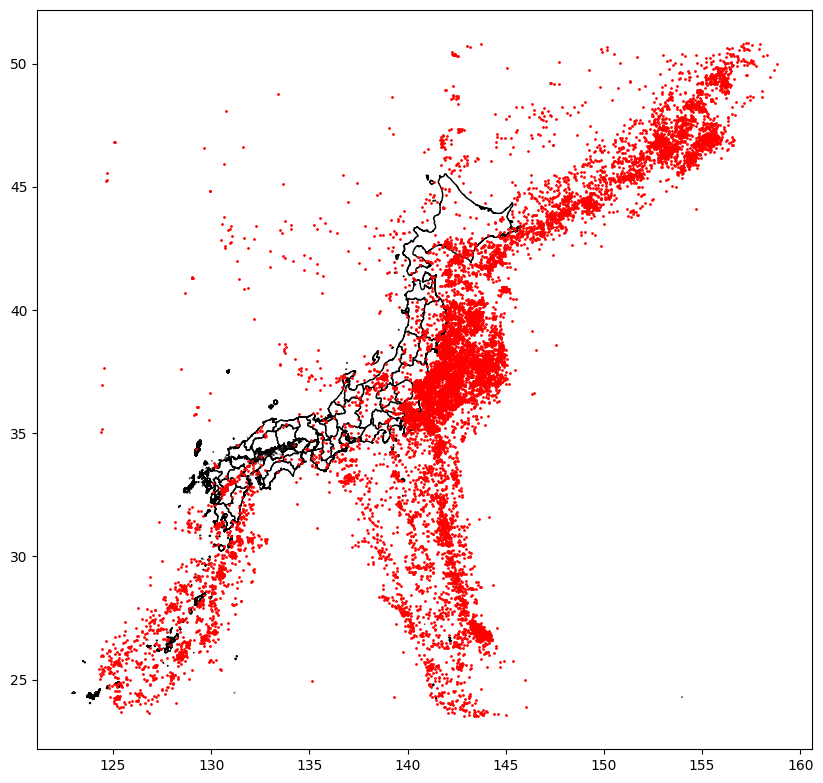

In [9]:
base = gdf_pref.plot(figsize=(10, 10), color='white', edgecolor='black')
gdf.plot(ax=base, color='red', markersize=1)

## Web Mercator projection

<Axes: >

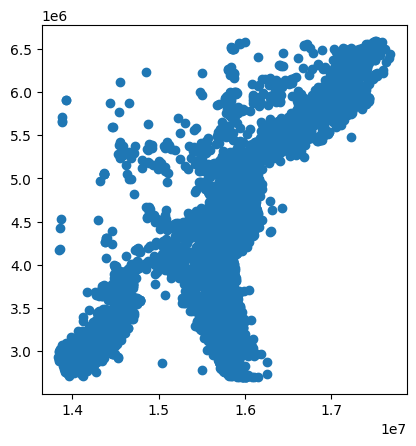

In [63]:
gdf = gdf.to_crs(epsg=3857)  

gdf.plot()

### Japan Population Density with Different Classification Schemes

Available columns: Index(['ID_1', 'NAME_1', 'ENGTYPE_1', 'PrefPopDen', 'geometry'], dtype='object')


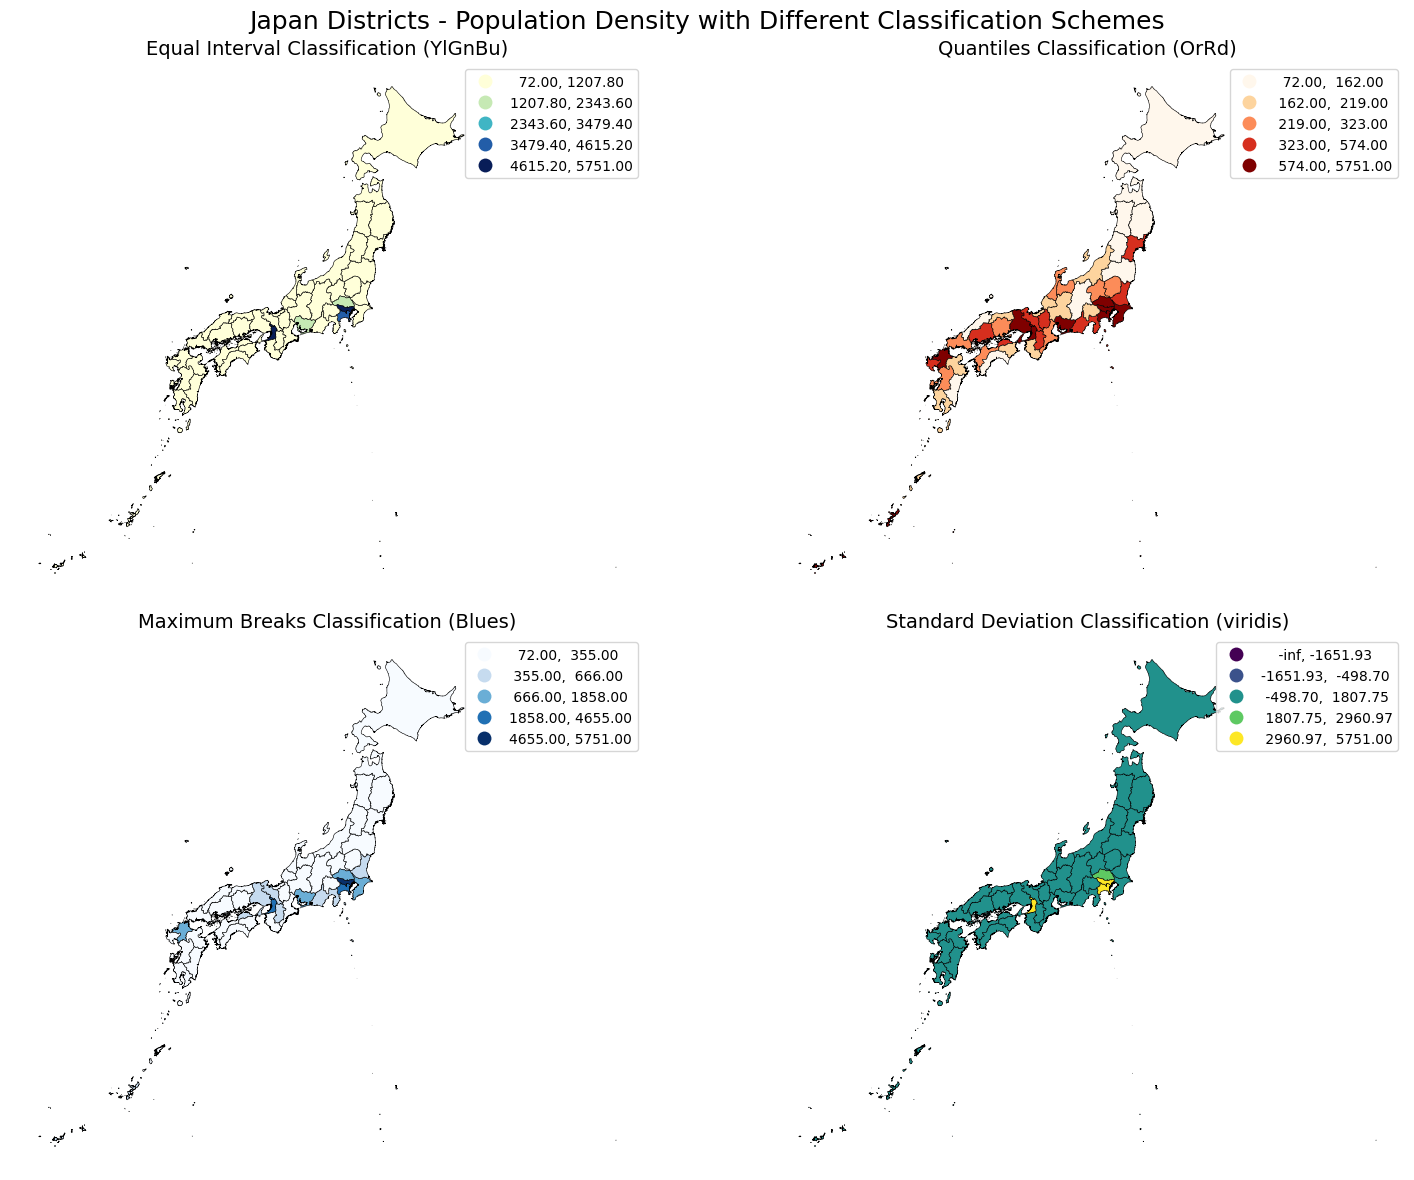

In [10]:

# Check available columns
print("Available columns:", gdf_pref.columns)

# Define your column for population density
column = 'PrefPopDen'  

# Define classification schemes and their custom colormaps
schemes = {
    'Equal Interval': ('equal_interval', 'YlGnBu'),
    'Quantiles': ('quantiles', 'OrRd'),
    'Maximum Breaks': ('natural_breaks', 'Blues'),
    'Standard Deviation': ('std_mean', 'viridis')
}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot each classification scheme
for ax, (title, (scheme, cmap)) in zip(axes, schemes.items()):
    gdf_pref.plot(
        column=column,
        cmap=cmap,
        scheme=scheme,
        k=5,
        legend=True,
        ax=ax,
        edgecolor='black',
        linewidth=0.4
    )
    ax.set_title(f"{title} Classification ({cmap})", fontsize=14)
    ax.axis('off')

# Main title and layout
plt.suptitle("Japan Districts - Population Density with Different Classification Schemes", fontsize=18)
plt.tight_layout()
plt.show()


### Spatial Filtering and Visualization of Earthquakes

C:\Users\IT\AppData\Local\Temp\ipykernel_13004\2623985193.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  lambda x: japan_buffer_50.unary_union.contains(x)
C:\Users\IT\AppData\Local\Temp\ipykernel_13004\2623985193.py:33: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  lambda x: japan_buffer_70.unary_union.contains(x)


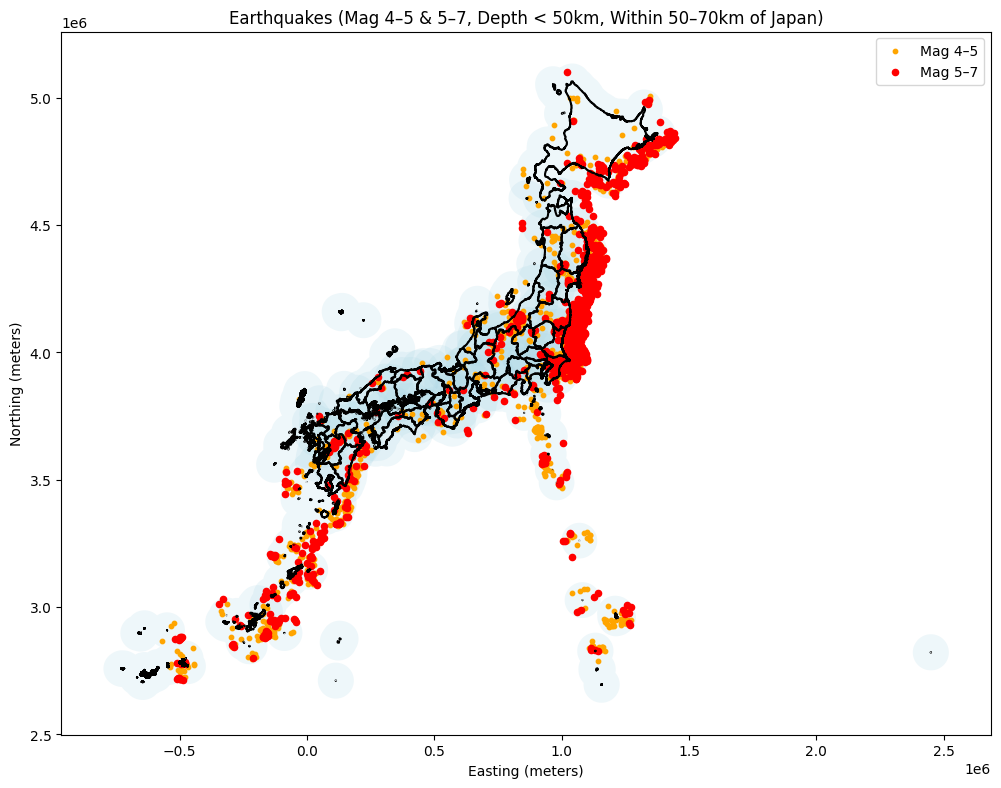

In [12]:
# Load Japan boundary shapefile
gdf_japan = gdf_pref
gdf_eq = gdf

# Reproject both to a metric CRS (meters)
gdf_eq = gdf_eq.to_crs(epsg=3099)
gdf_japan = gdf_japan.to_crs(epsg=3099)

# Filter by magnitude and depth
# Moderate (4–5), Shallow (<50 km)
moderate_eq = gdf_eq[
    (gdf_eq['mag'] >= 4.0) & 
    (gdf_eq['mag'] < 5.0) & 
    (gdf_eq['depth'] < 50)
].copy()

# Strong (5–7), (<70 km)
strong_eq = gdf_eq[
    (gdf_eq['mag'] >= 5.0) & 
    (gdf_eq['mag'] <= 7.0) & 
    (gdf_eq['depth'] < 70)
].copy()

# Buffer zones
japan_buffer_50 = gdf_japan.buffer(50000)   # 50 km buffer for moderate earthquakes
japan_buffer_70 = gdf_japan.buffer(70000)   # 70 km buffer for strong earthquakes

# Apply buffer filter to both
moderate_eq['within_50km'] = moderate_eq.geometry.apply(
    lambda x: japan_buffer_50.unary_union.contains(x)
)
strong_eq['within_70km'] = strong_eq.geometry.apply(
    lambda x: japan_buffer_70.unary_union.contains(x)
)

# Keep only nearby earthquakes
moderate_near = moderate_eq[moderate_eq['within_50km']].copy()
strong_near = strong_eq[strong_eq['within_70km']].copy()

# Plotting
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))

# Plot prefecture boundaries
gdf_japan.boundary.plot(ax=ax, color='black')

# Plot 70 km buffer (as a background)
japan_buffer_70.plot(ax=ax, color='lightblue', alpha=0.2)

# Plot moderate and strong nearby earthquakes
moderate_near.plot(ax=ax, color='orange', markersize=10, label='Mag 4–5')
strong_near.plot(ax=ax, color='red', markersize=20, label='Mag 5–7')

# Add title and labels
plt.title("Earthquakes (Mag 4–5 & 5–7, Depth < 50km, Within 50–70km of Japan)")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.legend()
plt.show()


### Apply DBScan  (Clustering)

In [14]:
# Combine both filtered earthquakes
combined_eq = pd.concat([moderate_near, strong_near], ignore_index=True)

# Extract coordinates
coords = np.array([[geom.x, geom.y] for geom in combined_eq.geometry])

# Apply DBSCAN
db = DBSCAN(eps=20000, min_samples=5).fit(coords)
combined_eq['cluster'] = db.labels_  # -1 = noise

# Filter only clustered (exclude noise)
clustered_eq = combined_eq[combined_eq['cluster'] != -1].copy()
clustered_eq

,latitude,longitude,depth,mag,place,geometry,within_50km,within_70km,cluster
0,36.0733,139.7830,48.82,4.8,"3km SSW of Sakai, Japan",POINT (930835.614 4002681.552),True,NaN,0
2,39.6014,141.9370,49.23,4.5,"4km SSW of Miyako, Japan",POINT (1095842.236 4406572.91),True,NaN,0
3,42.6765,141.9846,35.00,4.8,"31km E of Tomakomai, Japan",POINT (1072395.392 4748602.81),True,NaN,1
4,44.7104,145.6708,22.35,4.7,"72km NNW of Otrada, Russia",POINT (1345280.094 5006482.17),True,NaN,2
5,44.4808,145.5972,13.17,4.5,"50km NNW of Otrada, Russia",POINT (1342800.592 4980205.023),True,NaN,2
...,...,...,...,...,...,...,...,...,...
2735,36.7710,139.3090,10.00,5.0,"eastern Honshu, Japan",POINT (884648.078 4078136.95),NaN,True,38
2738,24.2660,125.2080,33.00,5.0,"southwestern Ryukyu Islands, Japan",POINT (-497130.144 2718926),NaN,True,29
2739,24.2630,125.1910,33.00,5.1,"southwestern Ryukyu Islands, Japan",POINT (-498896.385 2718714.302),NaN,True,29
2740,24.2690,125.1120,15.70,5.8,"southwestern Ryukyu Islands, Japan",POINT (-506946.358 2719963.004),NaN,True,29


In [15]:
# Spatial join: assign each earthquake to a prefecture
clustered_eq_pref = gpd.sjoin(clustered_eq, gdf_japan, how='left', predicate='within')

# Count number of clustered earthquakes per prefecture
pref_cluster_counts = clustered_eq_pref.groupby('NAME_1').size().reset_index(name='PrefPopDen')

# Join back with the Japan GeoDataFrame to visualize
# pref_cluster_counts = clustered_eq_pref.groupby('NAME_1').size().reset_index(name='PrefPopDen')
# gdf_japan['eq_cluster_count'] = gdf_japan['PrefPopDen'].fillna(0)

pref_cluster_counts

,NAME_1,PrefPopDen
0,Akita,9
1,Chiba,46
2,Fukuoka,2
3,Fukushima,113
4,Gifu,3
5,Gunma,4
6,Hokkaido,46
7,Ibaraki,72
8,Ishikawa,5
9,Iwate,34


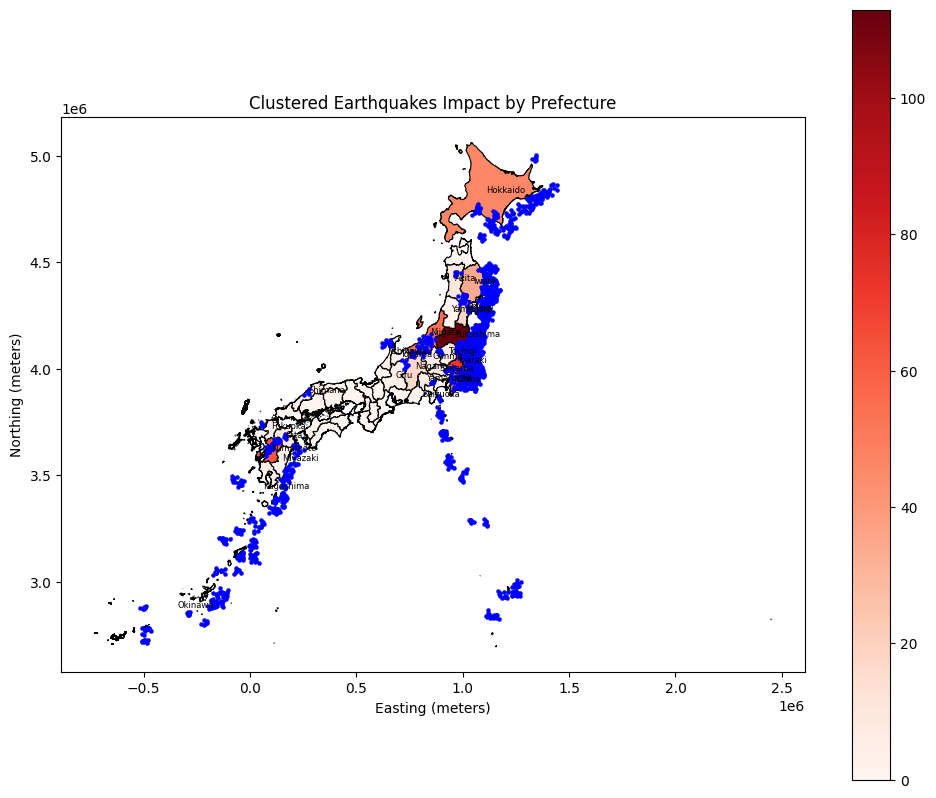

In [16]:
# Make sure gdf_japan has a unique index
gdf_japan = gdf_japan.reset_index(drop=False) 

# Spatial join between Japan prefectures and clustered earthquakes
clustered_join = gpd.sjoin(clustered_eq, gdf_japan, how='left', predicate='intersects')

# Count how many clustered EQs fall in each prefecture by 'index'
cluster_counts = clustered_join['index'].value_counts()

# Merge back into gdf_japan
gdf_japan['eq_cluster_count'] = gdf_japan['index'].map(cluster_counts).fillna(0).astype(int)


# STEP 3: Plot
fig, ax = plt.subplots(figsize=(12, 10))

# Choropleth map of cluster counts
gdf_japan.plot(
    column='eq_cluster_count',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='black',
    legend=True
)

# Plot earthquake cluster points
clustered_eq.plot(ax=ax, color='blue', markersize=5)

# Annotate affected prefectures only
affected_prefectures = gdf_japan[gdf_japan['eq_cluster_count'] > 0]

for idx, row in affected_prefectures.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(text=row['NAME_1'], xy=(centroid.x, centroid.y), fontsize=6, color='black')

plt.title("Clustered Earthquakes Impact by Prefecture")
# plt.axis('off')
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.show()


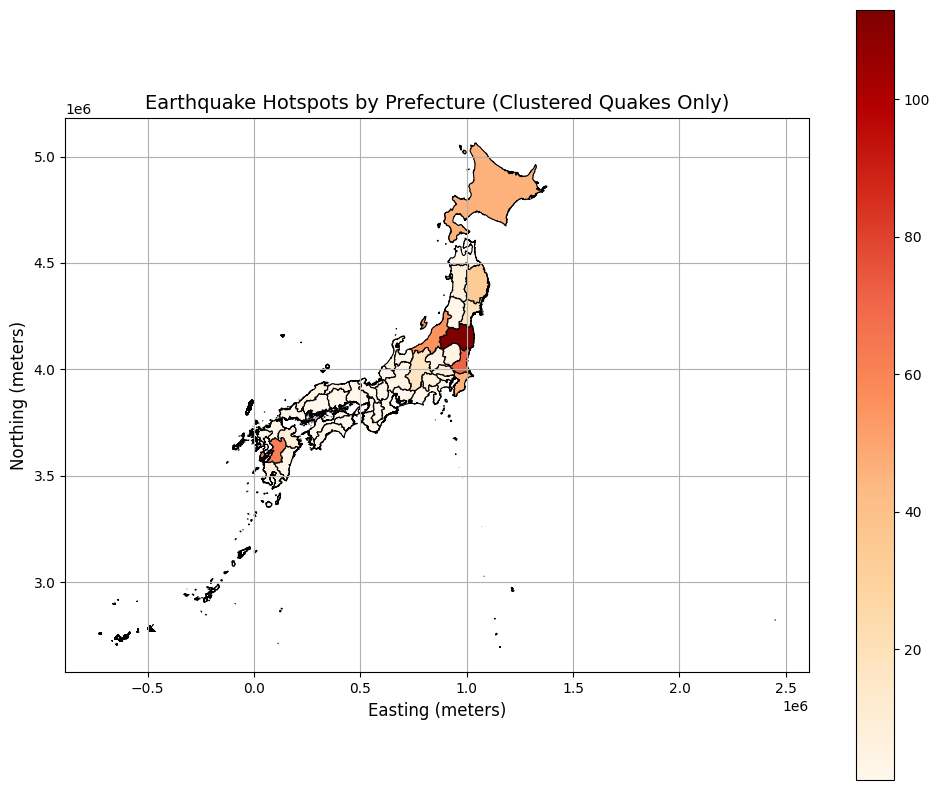

In [19]:
# Count quakes per prefecture
counts = gpd.sjoin(gdf_japan, clustered_eq, how='left', predicate='intersects')
quake_counts = counts.groupby('NAME_1').size().reset_index(name='quake_count')

# Merge with gdf_japan
gdf_japan = gdf_japan.merge(quake_counts, on='NAME_1', how='left')
gdf_japan['quake_count'] = gdf_japan['quake_count'].fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
gdf_japan.plot(column='quake_count', cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True, ax=ax)
# Add axis labels
plt.xlabel("Easting (meters)", fontsize=12)
plt.ylabel("Northing (meters)", fontsize=12)
plt.title("Earthquake Hotspots by Prefecture (Clustered Quakes Only)", fontsize=14)
plt.grid(True)  # Optional: add grid for better spatial sense
plt.show()


### Affected prefectures 

In [20]:
# Spatial join (clustered quakes with Japan prefectures)
affected_prefectures = gpd.sjoin(gdf_japan, clustered_eq, how='inner', predicate='intersects')

# Drop duplicates to get unique prefectures
affected_prefectures = affected_prefectures.drop_duplicates(subset='NAME_1')  # update column name if needed

# Sort and print
affected_prefectures = affected_prefectures.sort_values('NAME_1')
print(f"Affected prefectures ({len(affected_prefectures)}):")
print(affected_prefectures[['NAME_1']])




Affected prefectures (25):
       NAME_1
1       Akita
3       Chiba
6     Fukuoka
7   Fukushima
8        Gifu
9       Gunma
11   Hokkaido
13    Ibaraki
14   Ishikawa
15      Iwate
17  Kagoshima
20   Kumamoto
23     Miyagi
24   Miyazaki
25     Nagano
28    Niigata
29       Oita
31    Okinawa
34    Saitama
36    Shimane
37   Shizuoka
38    Tochigi
42     Toyama
44   Yamagata
46  Yamanashi


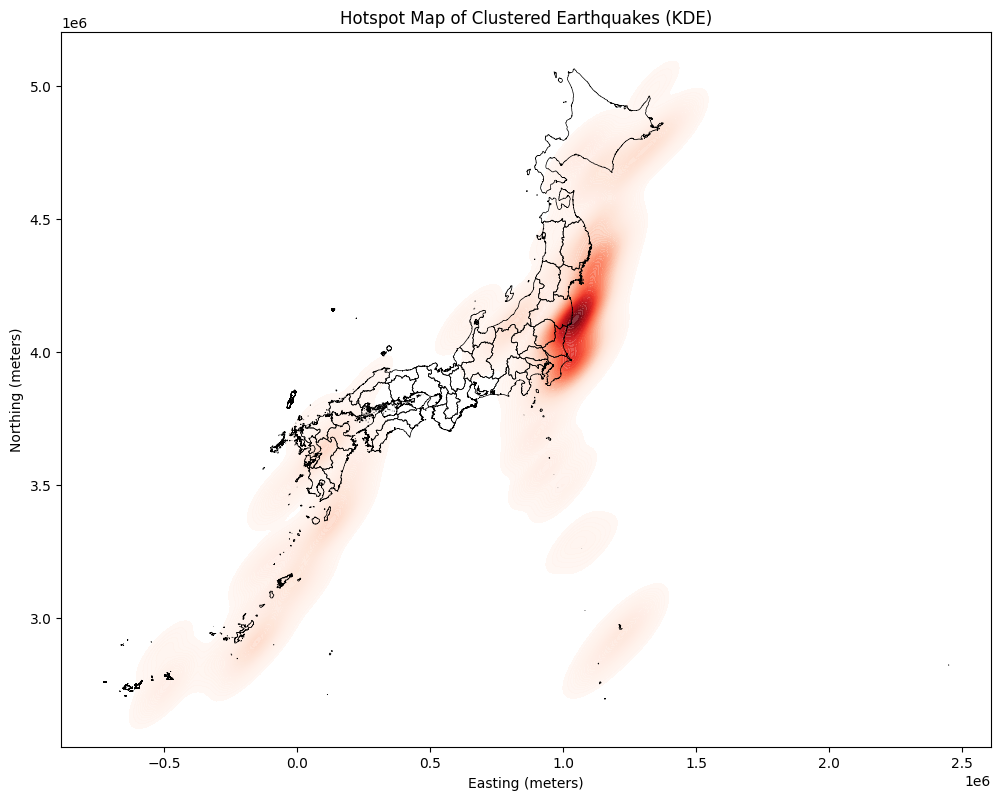

In [21]:
# Extract clustered coordinates
coords = np.array([[geom.x, geom.y] for geom in clustered_eq.geometry])

# KDE heatmap
plt.figure(figsize=(12, 10))
sns.kdeplot(
    x=coords[:, 0],
    y=coords[:, 1],
    cmap="Reds",
    fill=True,
    bw_adjust=0.5,  # adjust smoothness
    levels=100,
    thresh=0.01,
    alpha=0.8
)

# Overlay Japan boundaries
gdf_japan.boundary.plot(ax=plt.gca(), color='black', linewidth=0.5)

plt.title("Hotspot Map of Clustered Earthquakes (KDE)")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.show()
